In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sbn

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 20)

# <center>Modelos Lineales</center>

Se consideran modelos lineales aquellos en los cuales la variable a predecir $y$ es una combinación lineal de las características $x_1, x_2...$ 

\begin{equation}
    \hat y = w_0 + w_1x_1 + w_2x_2 + ...
\end{equation}

Los valores $w_0, w_1, w_2...$ son los coeficientes de la regresión y por tanto son aquellos que determinan el modelo y son el objetivo de las diferentes técnicas que se estudiarán. El coeficiente $w_0$ recibe el nombre de intercepto. En Skilearn, luego de entrenar un estimador, para obtener el valor de $w_0$ usamos <code>model.intercept_</ code>, para los demás usamos <code>model.coef_</ code>.

El módulo <code>linear_regression</ code> de Skilearn contiene una gran variedad de modelos lineales y técnicas que podemos utilizar con estos. En el presente notebook se verán algunos de los principales tales como

   - <code>LinearRegression</ code>
   - <code>Ridge</ code>
   - <code>Lasso</ code>
   - <code>SGDRegressor</ code>

## <code>LinearRegression</code>

Este es el algoritmo de regresión lineal más básico y utiliza Ordinary Least Square (OLS) para hallar en valor de los coeficientes $w_i$, esto es, minimizar la suma cuadrática de los residuales entre la variable target $y$ y la combinación lineal de las características (features) $\textbf{X}$: 


\begin{equation}
   \text{Min}  \sum_{i=1}^n (X_i\cdot w - y_i)^2 
\end{equation}

A continuación un ejemplo del uso de <code>LinearRegression</code> utiliando una única feature. Se utiliza la base de datos de autimóviles.

In [2]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [3]:
# Una pequeña limpieza
# Columnas del DataFrame
df.columns = df.columns.str.replace("-", "_")
df.columns

Index(['symboling', 'normalized_losses', 'make', 'aspiration', 'num_of_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'city_L/100km', 'horsepower_binned', 'diesel', 'gas'],
      dtype='object')

In [4]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

Si bien no existe una planilla estricta con la cual se contruyen los modelos de ML, esto suelen seguir algunos estándares:

   - Separar los datos en features $\textbf{X}$ y target $y$.
   - Dividir los conjuntos anteriores en datos para entrenamiento (training set) y datos para testeo 
       (testing set) del modelo luego de ser entrenado. 
   - Entrenar el modelo utilizando los datos de entrenamiento.
   - Utilizar el modelo para predecir.
   
Entre cada uno de estos pasos pueden existir tantos pasos intermedios como lo requiera el trabajo a realizar, por ejemplo, es habitual realizar una estandarización de los datos. 
  

In [5]:
# 1.
# Separemos los datos en features y target
# Features
X = df['engine_size'].values.reshape(-1,1)

# target
y = df['price'].values.reshape(-1,1)

In [6]:
X.shape, y.shape

((196, 1), (196, 1))

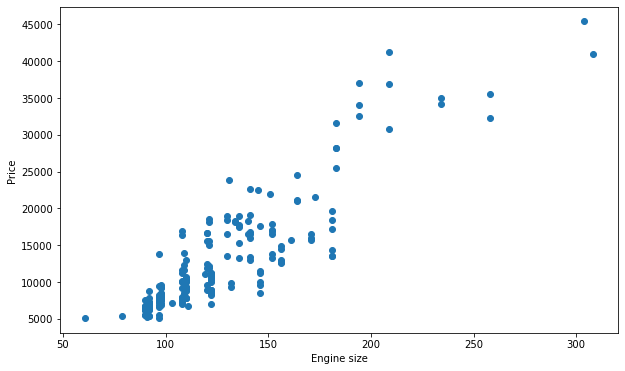

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X, y)

ax.set_xlabel(f"Engine size")
ax.set_ylabel(f"Price")
plt.show()

In [8]:
# 2.
# Datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [9]:
len(X), len(X_train), len(X_test)

(196, 156, 40)

In [10]:
print(f"Porcentaje datos de prueba = {len(X_test)/len(X)*100: .2f}%")

Porcentaje datos de prueba =  20.41%


In [11]:
# 3. 
# Estimador y predictor
linear = LinearRegression()

# 4. Entrenamiento/Estimación
linear.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predictor
# Luego se pueden realizar predicciones
# Predicción para los datos de entrenamiento
y_pred = linear.predict(X_train)

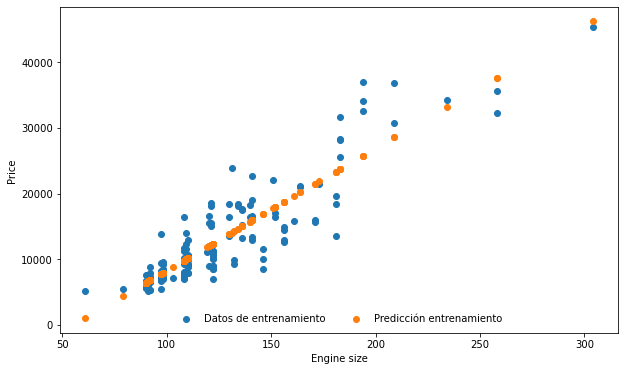

In [13]:
# Representación gráfica de la predicción
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X_train, y_train, label="Datos de entrenamiento")
ax.scatter(X_train, y_pred,  label="Predicción entrenamiento")

ax.set_xlabel(r'Engine size')
ax.set_ylabel(r'Price')
plt.legend(frameon=False, ncol=2, loc="lower center")
plt.show()

Más adelante se hablará con mayor detalle sobre las métricas, por ahora las utilizaremos sin dar mayores detalles.

In [14]:
# Métricas de la predicción
print(f"R2_train = {linear.score(X_train, y_train)}")
print(f"R2_test  = {linear.score(X_test, y_test)}")

R2_train = 0.8123324009408551
R2_test  = 0.7163191178271022


In [15]:
# Los coeficientes (parámetros del modelo) de la regresión lineal
print(f"m = {linear.coef_}")
print(f"b = {linear.intercept_}")

m = [[185.76252361]]
b = [-10272.70309861]


In [16]:
# Predicciones con el modelo
y_pred_test = linear.predict(X_test)
y_pred_test[:10]

array([[ 9975.41197445],
       [23350.31367409],
       [23350.31367409],
       [10161.17449806],
       [33195.72742522],
       [17963.20048952],
       [ 6817.44907315],
       [ 7746.26169118],
       [16848.62534788],
       [ 6445.92402594]])

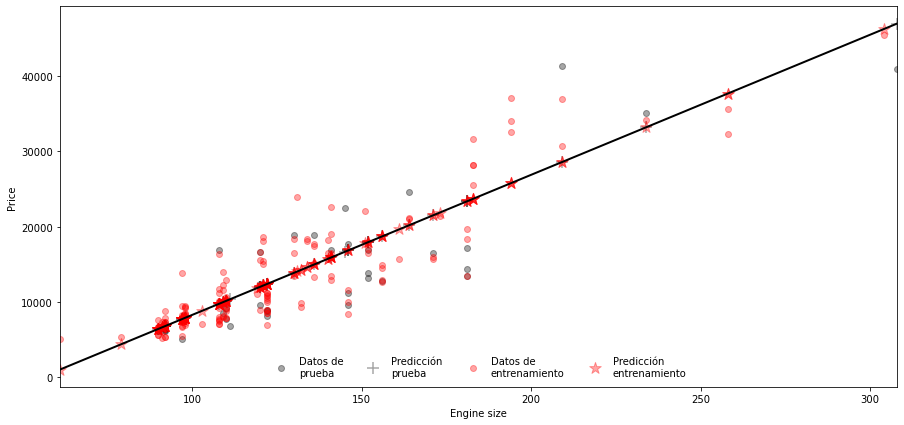

In [17]:
# Representación gráfica de la predicción + datos de prueba
fig, ax = plt.subplots(figsize=(15, 7))

ax.scatter(X_test,  y_test,      color='black', label=f'Datos de\nprueba',          marker="o", alpha=0.35)
ax.scatter(X_test,  y_pred_test, color='black', label=f'Predicción\nprueba',        marker="+", s=150, alpha=0.35)
ax.scatter(X_train, y_train,     color='red',   label=f'Datos de\nentrenamiento',   marker="o", alpha=0.35)
ax.scatter(X_train, y_pred,      color='red',   label=f'Predicción\nentrenamiento', marker="*", s=150, alpha=0.35)

x = np.linspace(min(X)[0], max(X)[0], 100)
ax.plot(x, (linear.coef_[0][0]*x + linear.intercept_[0]), color="k", linewidth=2)

ax.set_xlim( min((min(X_train),min(X_test))), max((max(X_train),max(X_test))) )
ax.set_xlabel(r'Engine size')
ax.set_ylabel(r'Price')
plt.legend(frameon=False, ncol=4, loc="lower center")
plt.show()

## <code>Ridge</code>

Ridge hace parte de los métodos de regularización. Estos buscan penalizar los coeficientes $w_i$ del modelo con el fin de controlar su valor impidiendo que crescan demasiado y en algunos casos volviéndolos nulos, esto último característica propia de la regresión de Lasso que veremos más adelante. El objetivo de la regresión de Ridge es minimizar la función de costo,  


\begin{equation}
   \text{Min}  \sum_{i=1}^n (X_i\cdot w - y_i)^2 + \alpha ||w||^2
\end{equation}

que se puede ver como compuesta por dos partes; un OLS más una penalización a los coeficientes dada por la expresión $\alpha ||w||^2$. Al adherir esta última componente se busca que los valores de los $w_i$ no crescan desproporcionalmente. $\alpha \geq 0$ es conocido como el **parámetro de complejidad** y su valor determina la magnitud de la regularización, un mayor valor de este implica una mayor regularización pues los coeficientes del modelo tendrán que disminuir su valor para poder compensar el alza en la función de coste. 

Como se puede ver, el termino que induce la regularización $\alpha ||w||^2$ implica una suma de los cuadrados de los coeficientes del modelo, esto tiene una implicación sobre la naturaleza de los datos con los cuales se realiza el entrenamiento: se deben normalizar o escalar previamente principalmente por dos razones. Imaginemos que tenemos un modelo para predecir el precio de un coche utilizando como features el tamaño del motor en $cm^3$ y el número de cilíndros que este tiene (magnitud adimensional), mientras la primera variable puede tener valores que abarquen un gran rango la segunda estará mucho más limitada (entre $4$ y $8$ para la base de datos que estamos trabajando) y por tanto el tamaño del motor tendrá un mayor impacto sobre el precio del coche dejando quizá muy poco protagonismo al número de cilíndros, lo cual no es un comportamiento esperado, esta es la primera razón por la que es necesario que todas las features que se utilicen para el modelo estén escaladas a un determinado rango. La segunda razón es un poco más obvia, dimensionalmente no es correcto sumar cantidades de diferente naturaleza, no podemos sumar peras con manzanas. En el [link]("https://towardsdatascience.com/whats-the-difference-between-linear-regression-lasso-ridge-and-elasticnet-8f997c60cf29") hay una discusión interesante al respecto. 